# Chapter 2

https://www.nltk.org/book/ch02.html

In [17]:
import nltk
from nltk.corpus import gutenberg
from nltk import * 
from nltk.corpus import inaugural
import matplotlib.pyplot as plt

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In 1, we showed how you could carry out concordancing of a text such as text1 with the command `text1.concordance()`. However, this assumes that you are using one of the nine texts obtained as a result of doing from
`nltk.book import *`. Now that you have started examining data from `nltk.corpus`, as in the previous example, you have to employ the following pair of statements to perform concordancing and other tasks from 1:

In [4]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [5]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [6]:
len(emma)

192427

In [7]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [8]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [9]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [10]:
from nltk.corpus import reuters
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

In [11]:
reuters.words('training/9865')[:8]

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French']

In [12]:
reuters.fileids('barley')[:5]

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871']

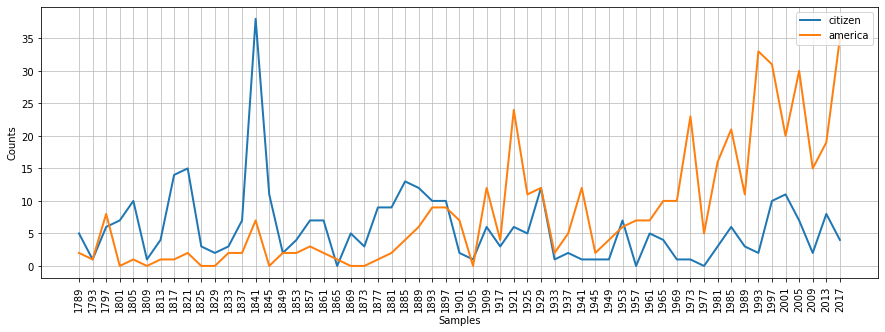

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
plt.figure(figsize=(15, 5))
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()

In [65]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '../Data'
bot = PlaintextCorpusReader(corpus_root, '.*')
bot.fileids()

['.DS_Store', '.ipynb_checkpoints/chat-checkpoint.txt', 'chat.txt']

In [67]:
bot.words('chat.txt')

['A', 'chatbot', '(', 'also', 'known', 'as', 'a', ...]

In [81]:
bots = bot.sents('chat.txt')

In [52]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [54]:
genre_word = [(genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)]
len(genre_word)

170576

In [83]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [85]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['news', 'romance']

In [86]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

In [87]:
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [88]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [89]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [90]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

In [91]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [92]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [93]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [94]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [111]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [112]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [113]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [114]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [115]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [116]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [117]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [119]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [120]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [122]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
len(paths)

2

In [123]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [124]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [125]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]